# VLE of glassy polymers

This is an example for a VLE calculation featuring a polymer and a solvent. PC-SAFT calculation for a water sorption isotherm of the polymer PVP were performed (the dotted line in Figure 2 of https://doi.org/10.3390/membranes12040434). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,D_Matrix,NETVLE
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

def convert(xi,Mi):
    return xi*Mi[:,None]/np.sum(xi*Mi[:,None],axis=0)

The the first part of the code is basically the same as presented in VLE_Water_Sorption_Polymer_part1.ipynb

In [2]:
nc=4
kij=D_Matrix(np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100]),nc)
kijA=D_Matrix(np.asarray([0,0,0,0,-0.455211419,0]),nc)

Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kapi=np.asarray([0.045099,0.032384,0.02,0.02])
N=np.asarray([1.,1.,3.,653.])

# mi=np.asarray([1.20469,1045.99,14.2829768])
# sigi=np.asarray([2.797059952,2.71,3.535])
# ui=np.asarray([353.95,205.599,262.791])
# epsAiBi=np.asarray([2425.67,0.,886.44])
# kapi=np.asarray([0.04509,0.02,0.02])
# N=np.asarray([1.,231.,3.])
# Mi=np.asarray([18.015,25700.,357.79])
# kij=np.asarray([
#     [0.,-0.128,-0.025],
#     [-0.128,0.,-0],
#     [-0.025,-0.,0.]])
# kijA=np.asarray([[0.]])

In [26]:
T=298.15
p=1E5
npoint=30
DL=0.05
kswp = 0.4279 #/ 0.03166**2
v0p = 0.7937/1000
polymer=np.asarray([False,False,False,True])
mobile=np.asarray([True,True,False,False])
ksw=np.asarray([0.2121,0.00001])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kapi,N)
ww=np.linspace(0.01,0.05,npoint)
we=np.linspace(0.01,0.05,npoint)
RHvec=[]
wwvec=[]
wevec=[]
for i,vali in enumerate(ww):
    for i,valj in enumerate(we):
        wASD=(1-vali-valj)
        vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kapi,N)
        wi=np.asarray([vali,valj,wASD*DL,wASD*(1-DL)])
        RS=NETVLE(T,wi,v0p,mobile,polymer,ksw,mi,sigi,ui,epsAiBi,kapi,N,vpures,Mi,kij,kijA)
        RHvec.append(RS)
        wwvec.append(vali)
        wevec.append(valj)
    
RHvec=np.fmin(np.fmax(np.asarray(RHvec),0),1)
wwvec=np.asarray(wwvec)
wevec=np.asarray(wevec)

fig1,ax1=plt.subplots()
fig2,ax2=plt.subplots()
X,Y=np.meshgrid(we,ww)
cf1=ax1.contourf(X,Y,RHvec[:,0].reshape((npoint,npoint)))
cf2=ax2.contourf(X,Y,RHvec[:,1].reshape((npoint,npoint)))
fig1.colorbar(cf1)
fig2.colorbar(cf2)
plt.show()

LinAlgError: Array must not contain infs or NaNs.

NameError: name 'lngammai' is not defined

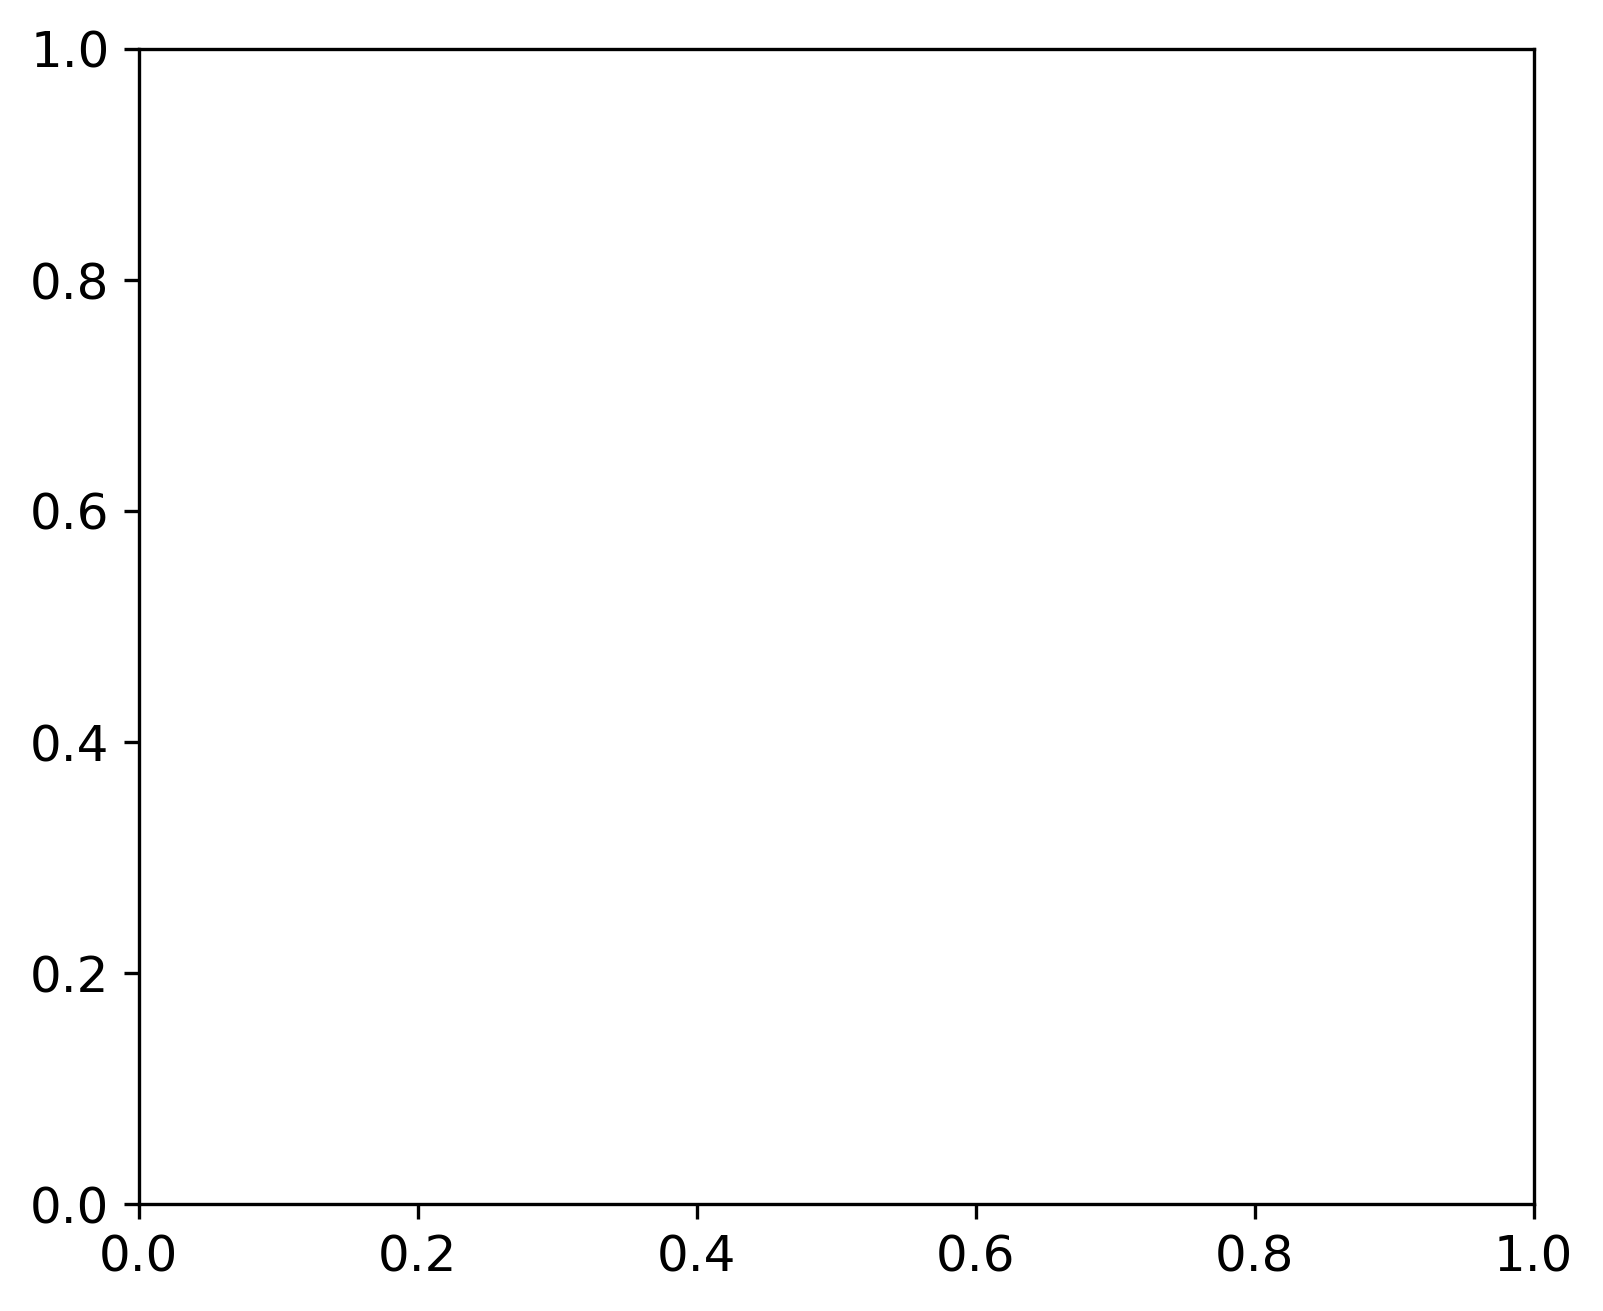

In [4]:


font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

colorVLE = "#99CC00"

fig, ax = plt.subplots(figsize = (6, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

RHexp = [0.9868,0.9858,0.9787,0.9749,0.9724,0.9685,0.9576,0.9565,0.9563,0.9217,0.89,0.8519,0.7998,0.7529]
wexp = [0.704,0.6808,0.6142,0.593,0.5808,0.5638,0.5162,0.5096,0.506,0.4175,0.3672,0.3193,0.275,0.246]
RHexp =np.asarray([9.82332155477042, 
29.89399293286229, 
44.73498233215558, 
59.85865724381636, 
73.28621908127221, 
87.7031802120143])/100

wexp = np.asarray([0.8158090091161938,
2.412388276865684,
3.6772277815721566,
5.412417970722018,
7.754075481782962,
12.246162069068014])/100

RHexp2 = [0.0924,0.2939,0.4449,0.599,0.7344,0.8781]
wexp2 = [0.0274269,0.0821512,0.1275743,0.1764984,0.237775,0.3401576]


w1vecnet=np.asarray([0,0.01010101,0.03030303,0.05050505050505051,0.07070707,0.08080808,0.1010101,0.15151515,0.2020202,0.2525252,0.29292929,0.32323232,0.35353535,0.36363636,0.37373737 ])

RHvecnet=np.asarray([0,0.08918283177229723,0.13443607581986078,0.1760292767458166,0.23249529616442166,0.2672469998598751,0.339728603928366,0.5152843958145663,0.6584131146365886,0.7752373315670975,0.8549372175803867,0.9084896086230553,0.957630227423256,0.9732295774807403,0.9882587661995547])


ax.plot(np.exp(lngammai[:,0]+np.log(w1)),w1, "--",color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(RHvec,wnet, "-.",color = colorVLE , 
        linewidth = 2.0, label = "NET-GP")
# ax.plot(RHvec[RHvec<RHvecnet],w1vec[RHvec<RHvecnet], "-",color = colorVLE , 
#         linewidth = 2.0, label = "PC-SAFT+NET-GP")
# ax.plot(RHvecnet[RHvec>RHvecnet],w1vecnet[RHvec>RHvecnet], "-",color = colorVLE , 
#         linewidth = 2.0)


ax.scatter(RHexp, wexp, s = 100, c = colorVLE, marker="^", 
            linewidth=1.0, edgecolor='k', label = "rubbery")
ax.scatter(RHexp2, wexp2, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "glassy")



ax.legend(fontsize="small")
ax.set_ylabel('$w_w$ / -')
ax.set_xlabel('$RH$ / -')
ax.axis([0, 1., 0, 0.8])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()